In [1]:
import cv2
import numpy as np

import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('img1.png')
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
_,img_bin = cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY)

In [3]:
template = cv2.imread('template1.png')
template_gray = cv2.cvtColor(template,cv2.COLOR_BGR2GRAY)
_,template_bin = cv2.threshold(template_gray,127,255,cv2.THRESH_BINARY)
kernel = np.array(template_bin==255,dtype=np.uint8)

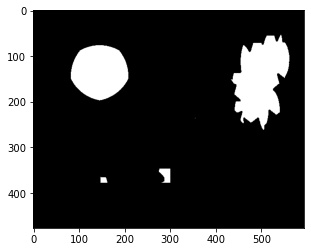

In [4]:
img_hit = cv2.morphologyEx(img_bin, cv2.MORPH_HITMISS, kernel)
plt.imshow(img_hit,cmap='gray')

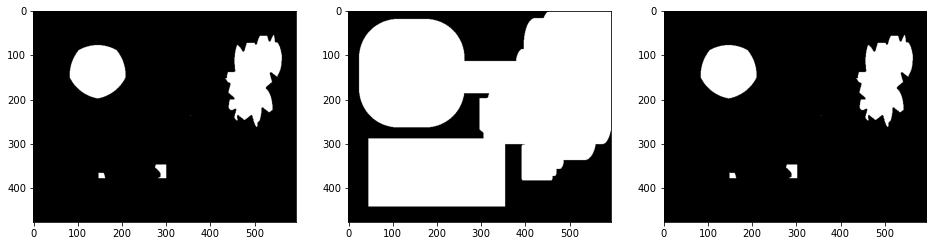

In [5]:
## 按步骤实现
tmp1 = cv2.erode(img_bin,kernel)
tmp2 = 255.0 - cv2.erode(255.0-img_bin,255.0-kernel)
result = cv2.bitwise_and(np.asarray(tmp1,dtype=np.uint8),np.asarray(tmp2,dtype=np.uint8))
plt.figure(figsize=(16,16))
plt.subplot(131)
plt.imshow(tmp1,cmap='gray')
plt.subplot(132)
plt.imshow(tmp2,cmap='gray')
plt.subplot(133)
plt.imshow(result,cmap='gray')

In [6]:
pos=[]
for i in range(result.shape[0]):
    for j in range(result.shape[1]):
        if(result[i,j]==255 and np.sum(result[i-1:i+2,j-1:j+2])==255):
            pos.append([i,j])

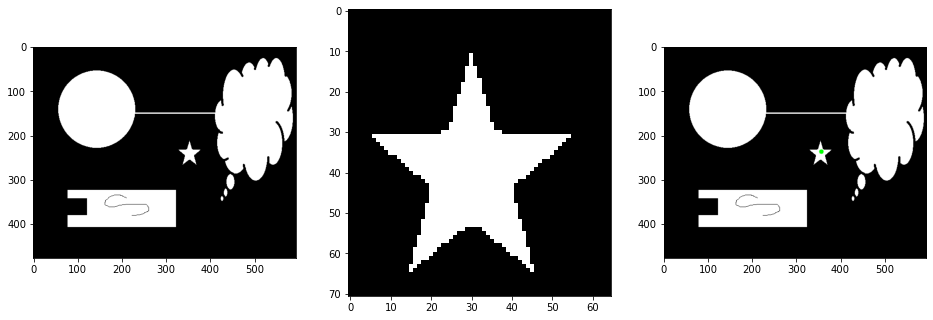

In [10]:
for i in range(len(pos)):
    cv2.circle(img,(pos[i][1],pos[i][0]),5,(0,255,0),-1)
plt.figure(figsize=(16,16))
plt.subplot(131)
plt.imshow(img_bin,cmap='gray')
plt.subplot(132)
plt.imshow(kernel,cmap='gray')
plt.subplot(133)
plt.imshow(img)